In [1]:
import torch 
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## データ作成

In [3]:
x = torch.linspace(0,499,steps=500)
y = torch.sin(x*2*3.1416/30) + 0.05*torch.randn(500)

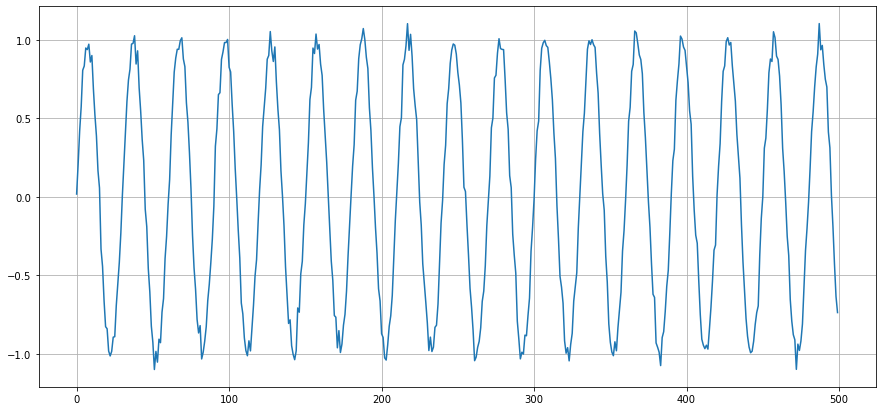

In [12]:
plt.figure(figsize=(15,7))
plt.grid(True)
plt.plot(x,y)

In [14]:
test_size=30
train_original_data = y[:-test_size]
test_original_data = y[-test_size:]

In [17]:
def sequence_creator(input_data, window):
    dataset = []
    data_len = len(input_data)
    for i in range(data_len- window):
        window_fr = input_data[i:i+window]
        label = input_data[i+window:i+window+1]
        dataset.append((window_fr, label))
    return dataset


In [18]:
window_size=30
train_data = sequence_creator(train_original_data, window_size)

## モデル定義

In [35]:
class LSTM_Model(nn.Module):
    def __init__(self, in_size=1, h_size=50, out_size=1):
        super().__init__()
        self.h_size = h_size
        self.lstm = nn.LSTM(in_size, h_size)
        self.fc = nn.Linear(h_size, out_size)
        
        self.hidden = (torch.zeros(1, 1,h_size), torch.zeros(1, 1, h_size))
        
    def forward(self, sequence_data):
        
        lstm_out, self.hidden = self.lstm(sequence_data.view(len(sequence_data), 1, 1), self.hidden)
        pred = self.fc(lstm_out.view(len(sequence_data), -1))
        
        return pred[-1]
        

In [36]:
torch.manual_seed(3)
model = LSTM_Model()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

## 学習する

In [37]:
epochs = 10
test = 30

loss_list = []

for epoch in range(epochs):
    for sequence_in, y_train in train_data:
        y_pred = model(sequence_in)
        loss = criterion(y_pred, y_train)
        
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1, 1,model.h_size), torch.zeros(1, 1, model.h_size))
        
        loss.backward()
        optimizer.step()
        
    loss_list.append(loss)
    
    print(f'Epoch {epoch+1} Loss {loss.item():.6f}' )

Epoch 1 Loss 0.248694
Epoch 2 Loss 0.137570
Epoch 3 Loss 0.080541
Epoch 4 Loss 0.030247
Epoch 5 Loss 0.003236
Epoch 6 Loss 0.000062
Epoch 7 Loss 0.000001
Epoch 8 Loss 0.000002
Epoch 9 Loss 0.000001
Epoch 10 Loss 0.000000


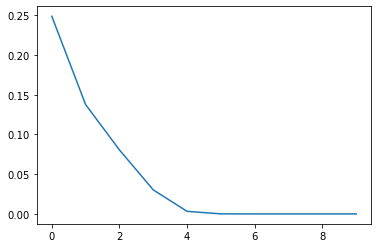

In [38]:
plt.plot(loss_list)

## 予測する

In [41]:
predict_list = []
predict_list = train_original_data[-window_size:].tolist()

Loss 0.018


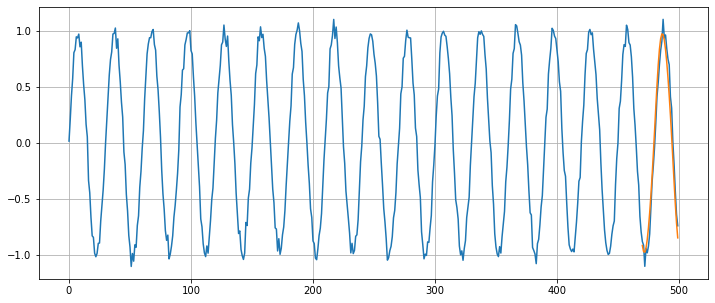

In [45]:
model.eval()

for i in range(test):
    sequence_in = torch.FloatTensor(predict_list[-window_size:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1, 1,model.h_size), torch.zeros(1, 1, model.h_size))
        predict_list.append(model(sequence_in).item())
        
loss = criterion(torch.tensor(predict_list[-window_size:]), y[470:])
print(f'Loss {loss.item():.3f}')

plt.figure(figsize=(12,5))
plt.grid(True)
plt.plot(y.numpy())
plt.plot(range(470,500) , predict_list[-window_size:])

## 未来データを予測する

In [48]:
epochs = 5
windows_size = 30
unknow = 30

full_data = sequence_creator(y, window_size)

model.train()

LSTM_Model(
  (lstm): LSTM(1, 50)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

In [49]:
for epoch in range(epochs):
    for sequence_in, y_train in full_data:
        y_pred = model(sequence_in)
        loss = criterion(y_pred, y_train)
        
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1, 1,model.h_size), torch.zeros(1, 1, model.h_size))
        
        loss.backward()
        optimizer.step()
        
    loss_list.append(loss)
    
    print(f'Epoch {epoch+1} Loss {loss.item():.6f}' )

Epoch 1 Loss 0.007271
Epoch 2 Loss 0.007183
Epoch 3 Loss 0.007106
Epoch 4 Loss 0.007038
Epoch 5 Loss 0.006977


In [53]:
predict_list = y[-window_size:].tolist()
model.eval()

for i in range(unknow):
    sequence = torch.FloatTensor(predict_list[-window_size:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1, 1,model.h_size), torch.zeros(1, 1, model.h_size))
        predict_list.append(model(sequence).item())
        


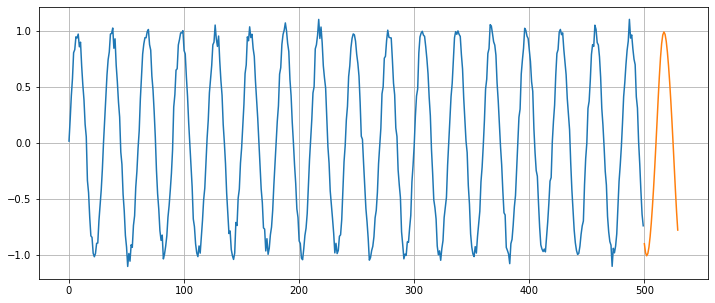

In [54]:
plt.figure(figsize=(12,5))
plt.grid(True)
plt.plot(y.numpy())
plt.plot(range(500,500+unknow) , predict_list[-window_size:])